In [1]:
from collections import defaultdict
import os
import sys 
from tqdm import tqdm
import itertools
import utils.file_utils as utils
sys.path.append("/data/jeff-law/projects/fungcat-function-prediction/src")
#sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))))
import fungcat_settings as f_settings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

/home/jeffl/.local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.chdir("/data/jeff-law/projects/fungcat-function-prediction")
os.getcwd()

'/data/jeff-law/projects/fungcat-function-prediction'

In [3]:
def plot_dist_eval_type(df_all, title="", ylabel="", xlabel="", out_file=None):
    # plot using the seaborn pairplot
    palette = sns.color_palette("Paired")
    fig, ax = plt.subplots()
    eval_types = df_all['eval-type'].unique()
    for i, eval_type in enumerate(eval_types):
        lengths = df_all[df_all['eval-type'] == eval_type]['length']
        sns.distplot(lengths, hist=False, kde_kws=dict(cumulative=True), ax=ax, color=palette[i], label=eval_type)
    ax.legend()
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if out_file is not None:
        print("Writing figure to %s" % (out_file))
        plt.savefig(out_file)
    plt.show()
    plt.close()

In [4]:
fmax_file = "/data/jeff-law/projects/fungcat-function-prediction/outputs/viz/eval-species/distances/expc-comp-iea-fmax-comparison.tsv"
fmax_df = pd.read_csv(fmax_file, sep='\t')
goid_names = dict(fmax_df[['goid', 'goid name']].values)
unweighted = ""
version = "2018_06-seq-sim-e0_1-string-700"

In [5]:
taxon_goids = fmax_df[['taxon', 'goid']].values
taxon_goids = taxon_goids[:10] #+ taxon_goids[-10:]
taxon_goids
# for t, g in taxon_goids:
#     print(t,g)
#     break

array([[208964, 'GO:0044264'],
       [208964, 'GO:0005976'],
       [208964, 'GO:0034637'],
       [208964, 'GO:0044262'],
       [83333, 'GO:0016052'],
       [208964, 'GO:0016051'],
       [83333, 'GO:0005975'],
       [208964, 'GO:0009064'],
       [208964, 'GO:0055114'],
       [83333, 'GO:0072329']], dtype=object)

/home/jeffl/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Dir outputs/viz/eval-species/distances/viz/top-25 doesn't exist. Creating it
Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0044264-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


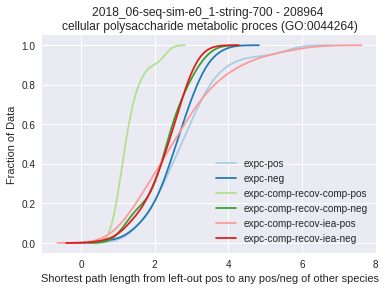

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0005976-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


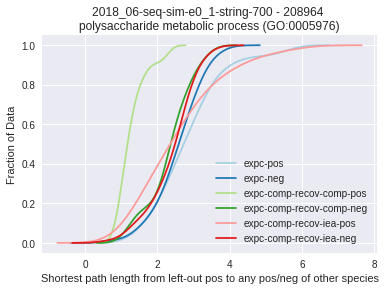

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0034637-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


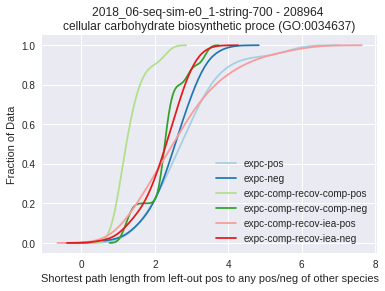

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0044262-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


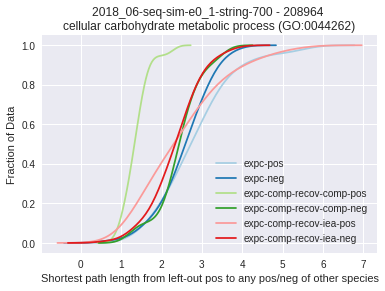

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0016052-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


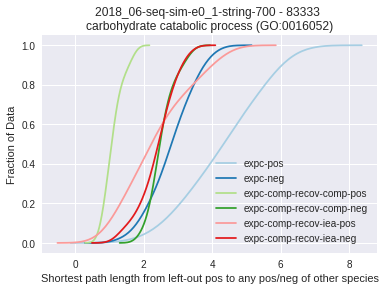

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0016051-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


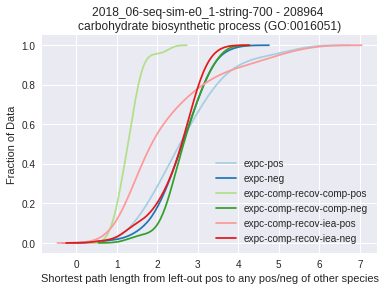

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0005975-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


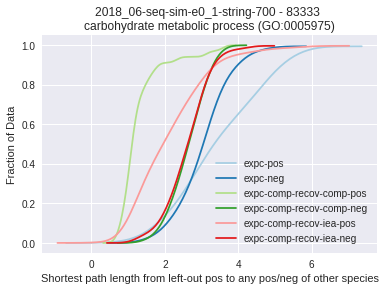

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0009064-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


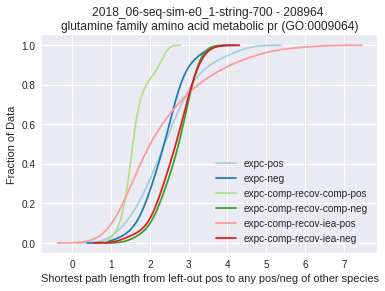

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0055114-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


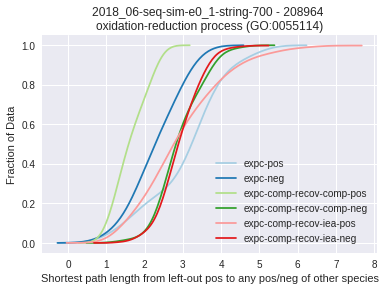

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0072329-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


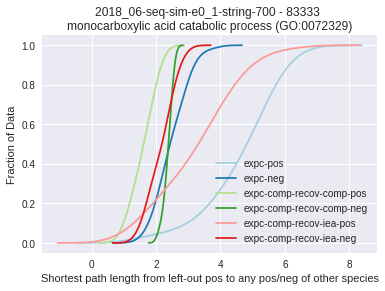

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0005975-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


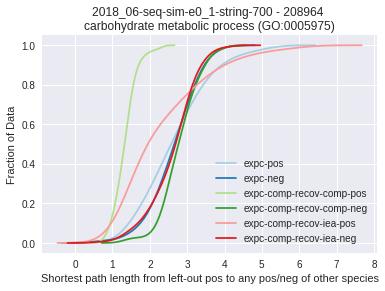

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0051716-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


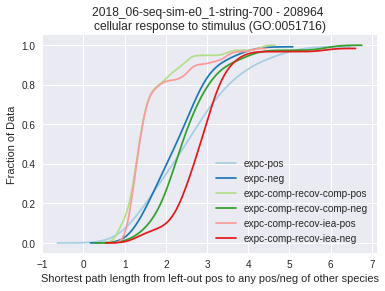

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0006974-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


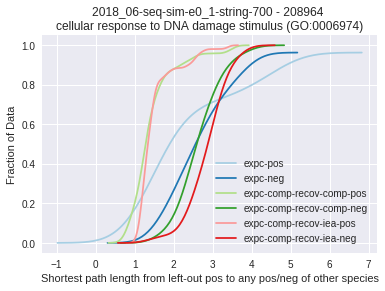

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0016051-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


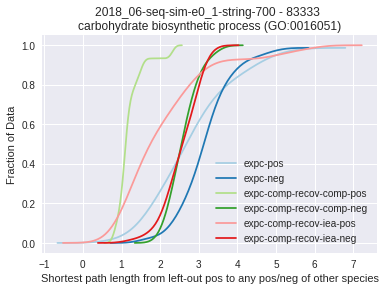

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0044262-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


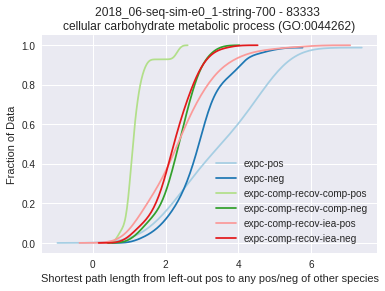

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0044282-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


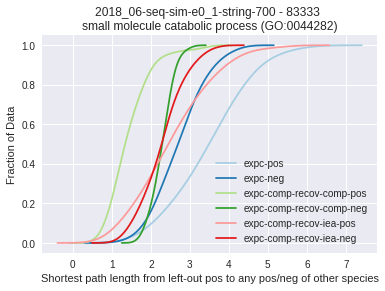

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0009311-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


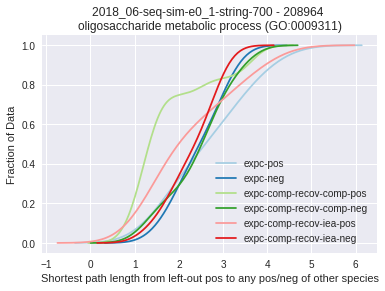

/home/jeffl/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Writing figure to outputs/viz/eval-species/distances/viz/top-25/83332-GO:0006979-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


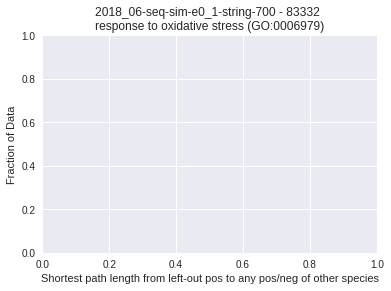

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0055114-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


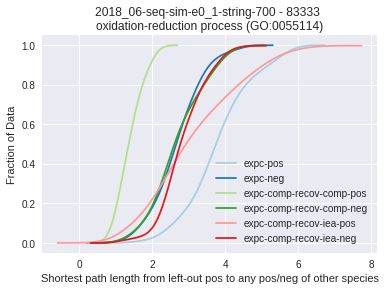

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0051188-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


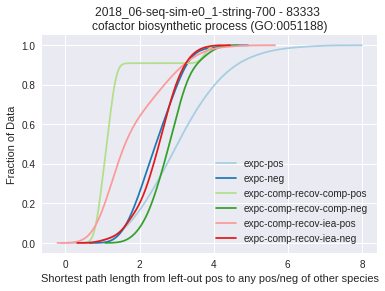

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0051186-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


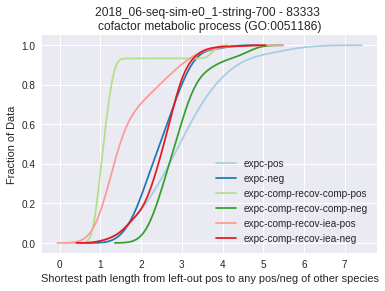

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:1901615-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


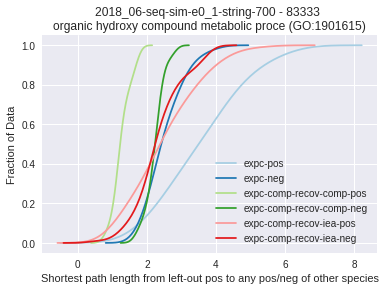

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:0043043-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


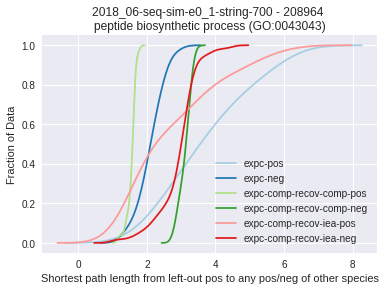

Writing figure to outputs/viz/eval-species/distances/viz/top-25/208964-GO:1901605-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


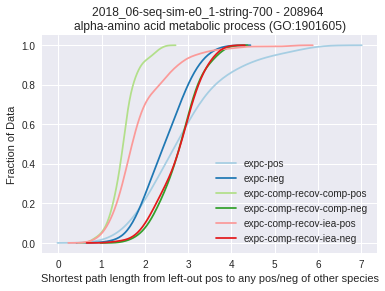

Writing figure to outputs/viz/eval-species/distances/viz/top-25/83333-GO:0019637-2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp.pdf


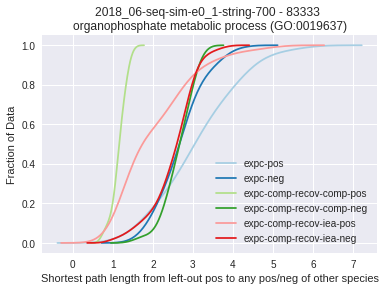

In [168]:
# plot the positive and negative distances for a single GO term for EXPC, COMP and IEA
# goid = "GO:0006974"
taxon = 208964
# goid = "GO:0016052"
# taxon = 83333
# taxon_goids = [(208964, "GO:0044264"), (208964, "GO:0006974"), (83333, "GO:0016052")]
taxon_goids = fmax_df[['taxon', 'goid']].values
taxon_goids = taxon_goids[:25]
unweighted = ""
version = "2018_06-seq-sim-e0_1-string-700"
for taxon, goid in taxon_goids:
    df_all = pd.DataFrame()
    for ev_codes, recov_codes in [('expc', ''), ('expc-comp', 'comp'), ('expc-comp', 'iea')]:
        exp_name = "%s-50-1000%s-core-bp-use-neg" % (ev_codes, recov_codes)
        for comparison in ("pos-pos", "pos-neg"):
            path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
            df = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])
            taxon_goid_df = df[(df['taxon'] == taxon) & (df['goid'] == goid)]
            key = "%s%s-%s" % (ev_codes, "-recov-%s" % (recov_codes) if recov_codes != "" else "", comparison.split('-')[1])
            taxon_goid_df['eval-type'] = key
            df_all = pd.concat((df_all, taxon_goid_df[['length', 'eval-type']]))
    # df_all.head()
    out_file = "outputs/viz/eval-species/distances/viz/top-25/%s-%s-%s-expc-comp-iea-bp.pdf" % (taxon, goid, version)
    utils.checkDir(os.path.dirname(out_file))
    title = "%s - %s \n%s (%s)" % (version, taxon, goid_names[goid][:40], goid)
    plot_dist_eval_type(df_all, title=title, ylabel="Fraction of Data",
            xlabel="Shortest path length from left-out pos to any pos/neg of other species",
            out_file=out_file,
            )

In [6]:
# just create the plot for these three taxon
taxons_to_plot = [83333, 208964, 83332]
# lets try plotting the distribution of everything
# TODO need to finish the other species
df_all = pd.DataFrame()
for ev_codes, recov_codes in [('expc', ''), ('expc-comp', 'comp'), ('expc-comp', 'iea')]:
    exp_name = "%s-50-1000%s-core-bp-use-neg" % (ev_codes, recov_codes)
    for comparison in ("pos-pos", "pos-neg"):
        path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
        df = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])
#         df = df[df['length'] < float('inf')] 
#         taxon_goid_df = df[(df['taxon'] == taxon) & (df['goid'] == goid)]
        key = "%s%s-%s" % (ev_codes, "-recov-%s" % (recov_codes) if recov_codes != "" else "", comparison.split('-')[1])
        df['eval-type'] = key
        df = df[df['taxon'].isin(taxons_to_plot)]
        # make sure the goterm is present in EXPC, COMP and ELEC?
        df_all = pd.concat((df_all, df[['taxon', 'length', 'eval-type']]))

# df_all.dropna(inplace=True)
df_all = df_all[~df_all.isin([np.nan, np.inf, -np.inf]).any(1)]
df_all.head()

,taxon,length,eval-type
0,83332,7.236028,expc-pos
1,83332,7.342401,expc-pos
2,83332,5.983516,expc-pos
3,83332,7.193642,expc-pos
4,83332,6.626861,expc-pos


writing to outputs/viz/eval-species/distances/viz/2018_06-seq-sim-e0_1-string-700-expc-comp-iea-bp-taxon-combined.pdf


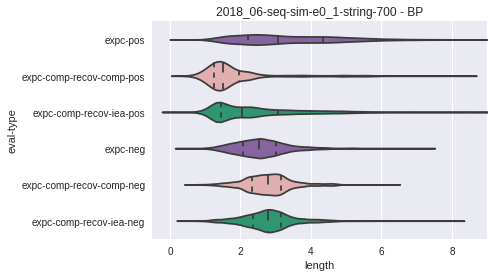

In [36]:
# palette = sns.color_palette(["#66a7d1", "#e05e49", sns.xkcd_rgb["jade"]])
palette = sns.color_palette(["#875aaa", "#e9a7a7", sns.xkcd_rgb["jade"]])
# palette = sns.color_palette("Paired")
order = ["expc-pos", "expc-comp-recov-comp-pos", "expc-comp-recov-iea-pos",
            "expc-neg", "expc-comp-recov-comp-neg", "expc-comp-recov-iea-neg"]
# now plot boxplots of the different eval-types
# sns.boxplot(y='eval-type', x='length', data=df_all, palette=palette,
#             fliersize=1, whis=2.5, hue='taxon', hue_order=[208964,83332,83333], order=order,
#            )
sns.violinplot(y='eval-type', x='length', data=df_all, palette=palette, order=order, inner="quartiles",
            #fliersize=1, #whis=2.5, hue='taxon', hue_order=[208964,83332,83333], order=order,
           )
plt.xlim(-0.5,9)
plt.title("%s - BP" % (version))
out_file = "outputs/viz/eval-species/distances/viz/%s-expc-comp-iea-bp-taxon-combined.pdf" % (version)
print("writing to %s" % (out_file))
plt.savefig(out_file)
plt.show()
plt.close()

In [35]:
# now run the kruskal wallis test to test for significant differences in these distributions, and use tukey's test for pairwise comparisons.
from scipy import stats
stat, pval = stats.kruskal(*[df_all[df_all['eval-type'] == eval_type]['length'].values for eval_type in order])
print("%0.3e" % pval)

0.000e+00


In [37]:
for i, eval_type1 in enumerate(order):
    for j, eval_type2 in enumerate(order):
        if j <= i: 
            continue
        e1 = df_all[df_all['eval-type'] == eval_type1]['length']
        e2 = df_all[df_all['eval-type'] == eval_type2]['length']
        test, pval = stats.mannwhitneyu(e1, e2)
        print("%s vs %s: %0.3e (n=%d, %d)" % (eval_type1, eval_type2, pval, len(e1), len(e2)))

expc-pos vs expc-comp-recov-comp-pos: 0.000e+00 (n=54346, 14267)
expc-pos vs expc-comp-recov-iea-pos: 0.000e+00 (n=54346, 91785)
expc-pos vs expc-neg: 0.000e+00 (n=54346, 54346)
expc-pos vs expc-comp-recov-comp-neg: 3.265e-272 (n=54346, 14265)
expc-pos vs expc-comp-recov-iea-neg: 0.000e+00 (n=54346, 91785)
expc-comp-recov-comp-pos vs expc-comp-recov-iea-pos: 0.000e+00 (n=14267, 91785)
expc-comp-recov-comp-pos vs expc-neg: 0.000e+00 (n=14267, 54346)
expc-comp-recov-comp-pos vs expc-comp-recov-comp-neg: 0.000e+00 (n=14267, 14265)
expc-comp-recov-comp-pos vs expc-comp-recov-iea-neg: 0.000e+00 (n=14267, 91785)
expc-comp-recov-iea-pos vs expc-neg: 0.000e+00 (n=91785, 54346)
expc-comp-recov-iea-pos vs expc-comp-recov-comp-neg: 0.000e+00 (n=91785, 14265)
expc-comp-recov-iea-pos vs expc-comp-recov-iea-neg: 0.000e+00 (n=91785, 91785)
expc-neg vs expc-comp-recov-comp-neg: 1.178e-233 (n=54346, 14265)
expc-neg vs expc-comp-recov-iea-neg: 0.000e+00 (n=54346, 91785)
expc-comp-recov-comp-neg vs expc-

In [41]:
import scikit_posthocs
# help(scikit_posthocs._posthocs.posthoc_dunn)
scikit_posthocs._posthocs.posthoc_dunn(df_all[['eval-type', 'length']], val_col='length', group_col='eval-type', p_adjust="bonferroni")

,expc-comp-recov-comp-neg,expc-comp-recov-comp-pos,expc-comp-recov-iea-neg,expc-comp-recov-iea-pos,expc-neg,expc-pos
expc-comp-recov-comp-neg,-1.000000e+00,0.0,1.0,0.0,2.303444e-137,1.139637e-140
expc-comp-recov-comp-pos,0.000000e+00,-1.0,0.0,0.0,0.000000e+00,0.000000e+00
expc-comp-recov-iea-neg,1.000000e+00,0.0,-1.0,0.0,0.000000e+00,0.000000e+00
expc-comp-recov-iea-pos,0.000000e+00,0.0,0.0,-1.0,0.000000e+00,0.000000e+00
expc-neg,2.303444e-137,0.0,0.0,0.0,-1.000000e+00,0.000000e+00
expc-pos,1.139637e-140,0.0,0.0,0.0,0.000000e+00,-1.000000e+00


In [34]:
# also get the median and MAD of each distribution
def mad(x):
    med = np.median(x)
    return np.median(np.abs(x - med))

for eval_type in order:
    vals = df_all[df_all['eval-type'] == eval_type]['length'].values
    print("%s: median %0.1f, MAD: %0.2f" % (eval_type, np.median(vals), mad(vals)))

expc-pos: median 3.1, MAD: 0.99
expc-comp-recov-comp-pos: median 1.5, MAD: 0.30
expc-comp-recov-iea-pos: median 2.1, MAD: 0.69
expc-neg: median 2.5, MAD: 0.46
expc-comp-recov-comp-neg: median 2.8, MAD: 0.40
expc-comp-recov-iea-neg: median 2.8, MAD: 0.40


In [3]:
def plot_path_lengths(df, title="", ylabel="", xlabel="", out_file=None, any_target=False):
    # convert the inf to -1
#     df.loc[df['length'] == float('inf'), 'length'] = -1
    # zoom in around < 4 or 5
#     df = df[(df['length'] <= 5) & (df['length'] > 0)]
    df = df[(df['length'] < float('inf'))]
    if any_target:
        df = df.groupby('p1').min()
#     df['length'].plot.hist(bins=df['length'].nunique())
#     df['length'].plot.hist(cumulative=True, normed=True)
#     plt.hist(df['length'], cumulative=True, normed=True)
    sns.distplot(df['length'], hist=False, kde_kws=dict(cumulative=True))
#     sns.kdeplot(df['length'], cumulative=True)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     plt.ylim(0,200)
#     plt.xlim(0,5)
    plt.show()
    if out_file is not None:
        print("Writing figure to %s" % (out_file))
        plt.savefig(out_file)
    plt.close()

In [87]:
def cdf_path_lengths(mid, low=None, high=None, **kwargs):
    fig, ax = plt.subplots()
    ranges = {}
    for arr, curr_str in [(mid, 'mid'), (low, 'low'), (high, 'high')]:
        weights = np.ones_like(arr)/float(len(arr))
        hist, bin_edges = np.histogram(arr, normed=0, bins=kwargs['bins'], weights=weights)
        print(hist, bin_edges)
        cumsum = np.cumsum(hist)
#         print(cumsum)
        ranges[curr_str] = (list(cumsum), list(bin_edges))
        
    ax.plot(ranges['mid'][1][1:], ranges['mid'][0])
    
    # need to match the x axis of the low and high
    (lowy, lowx), (highy, highx) = ranges['low'], ranges['high']
    lowx, highx = lowx[1:], highx[1:]
    add_high_y = []
    for x in lowx:
        if x < highx[0]:
            add_high_y.append(0)
        # if for some reason, it hits 1 first, then add those values
        if x > highx[-1]:
            highy.append(1)
    highy = add_high_y + highy
    print(highy)
    add_low_x = []
    for x in highx:
        if x > lowx[-1]:
            lowx.append(x)
            lowy.append(1)
        # if for some reason, the "high" goes above 0 first, add those values
        if x < lowx[0]:
            add_low_x.append(x)
            lowy = [0] + lowy
#     if len(highx) < len(lowx):
#         new_highy = []
#         j = 0
#         for i, x in enumerate(lowx):
#             if x == highx[j]:
#                 new_highy.append(highy[j])
#                 j += 1
#                 continue
# #             for j, x1 in enumerate(highx.copy()):
#             while x > highx[j] and x < highx[j+1]:
#                 new_highy.append(x)
                    
                
    print(lowy)
    lowx = add_low_x + lowx
    print(lowx)
    print(len(lowx), len(lowy), len(highy))
    ax.fill_between(lowx, lowy, highy, alpha=kwargs['alpha'])

0: GO:0044419 328    0.0952
Name: fmax, dtype: float64
0.5: GO:0006355 311    0.8517
Name: fmax, dtype: float64
1: GO:0070475 568    1.0
Name: fmax, dtype: float64
(array([0.00564972, 0.        , 0.00564972, 0.02259887, 0.03389831,
       0.03389831, 0.07909605, 0.38418079, 0.29378531, 0.14124294]), array([-4.41361812, -3.70132368, -2.98902924, -2.27673481, -1.56444037,
       -0.85214593, -0.13985149,  0.57244295,  1.28473738,  1.99703182,
        2.70932626]))
(array([0.05 , 0.075, 0.025, 0.225, 0.275, 0.075, 0.175, 0.075, 0.   ,
       0.025]), array([-2.89964048, -2.49215044, -2.08466039, -1.67717035, -1.26968031,
       -0.86219026, -0.45470022, -0.04721018,  0.36027987,  0.76776991,
        1.17525995]))
(array([0.3, 0.1, 0.3, 0.1, 0. , 0.1, 0. , 0. , 0. , 0.1]), array([1.18902443, 1.38394052, 1.5788566 , 1.77377269, 1.96868878,
       2.16360487, 2.35852096, 2.55343704, 2.74835313, 2.94326922,
       3.13818531]))
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.30000000000000004, 0.4, 0.700000

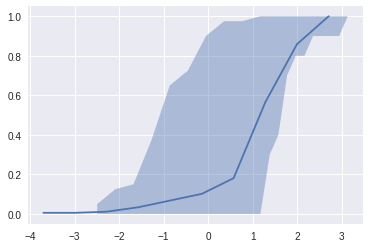

In [89]:
# for val in [0,0.25,0.5,0.75,1]:
# for val in [0.25,0.5,0.75]:
length_ranges = []
# for val in [0.25,0.5,0.75]:
for val in [0,0.5,1]:
    goid = goids[int((len(goids)-1)*val)]
    fmax = fmax_df[fmax_df['goid'] == goid]['fmax']
    print("%s: %s %s" % (val, goid, fmax))
    taxon_goid_df = df_comb[(df_comb['taxon'] == taxon) & (df_comb['goid'] == goid)]
    length_ranges.append(taxon_goid_df['length'])
#     plot_path_lengths(taxon_goid_df, 
#         title="%s - %s - %s - %s" % (version, taxon, goid, comparison),
#         ylabel="Frequency",
#         xlabel="Shortest path length from left-out %s to %s of other species" % (comparison.split('-')[0], comparison.split('-')[1]),
#         any_target=False,
#     )

cdf_path_lengths(length_ranges[1], low=length_ranges[0], high=length_ranges[2], bins=10, alpha=0.4)

In [33]:
np.sum(hist)

1.0000000000000004

In [11]:
exp_name = "expc-comp-50-1000comp-core-bp-use-neg"
version = "2018_06-seq-sim-e0_1-string-700"
# unweighted = "-unw"
unweighted = ""
comparison = "pos-pos"
# path_lengths_file = "outputs/viz/eval-species/distances/%s-%s-%s-%%s-nx.tsv" % (version, goid, taxon)
path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
# for comparison in ["pos-pos", "pos-neg", "neg-pos"]:
df = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])
taxon = 243277

In [12]:
fmax_file = "/data/jeff-law/projects/fungcat-function-prediction/outputs/2018_06-seq-sim-e0_1-string-700/all/sinksource/expc-comp-50-1000comp-core-bp-use-neg/loso-swsn-l0-a0_95-eps0_0-maxi10.txt"
fmax_df = pd.read_csv(fmax_file, sep='\t')
fmax_df = fmax_df[fmax_df['#taxon'] == taxon]
fmax_df = fmax_df[['goid', 'fmax']].sort_values('fmax')
goids = fmax_df['goid'].values
# df[['goid', 'fmax']].quantile(0.5, numeric_only=False)

0: GO:0044419 328    0.0952
Name: fmax, dtype: float64


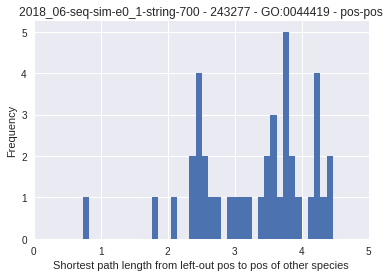

0.25: GO:0009066 381    0.7869
Name: fmax, dtype: float64


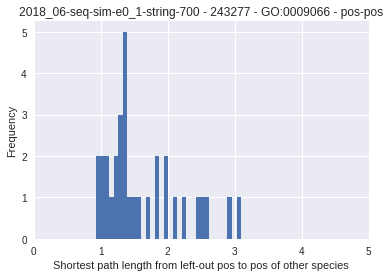

0.5: GO:0006355 311    0.8517
Name: fmax, dtype: float64


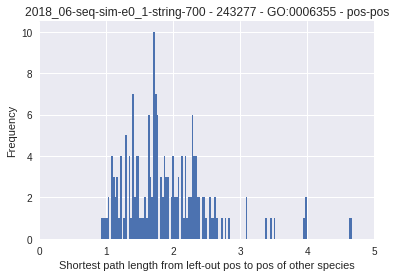

0.75: GO:0072527 386    0.9091
Name: fmax, dtype: float64


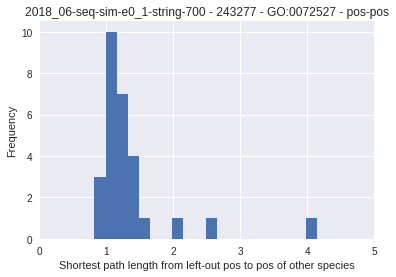

1: GO:0070475 568    1.0
Name: fmax, dtype: float64


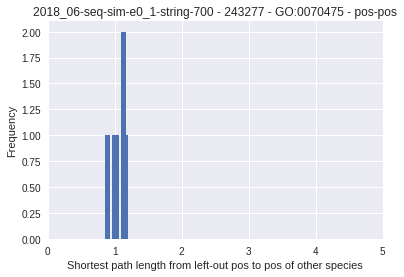

In [93]:
for val in [0,0.25,0.5,0.75,1]:
# for val in [0.26,0.49,0.75]:
    goid = goids[int((len(goids)-1)*val)]
    fmax = fmax_df[fmax_df['goid'] == goid]['fmax']
    print("%s: %s %s" % (val, goid, fmax))
    taxon_goid_df = df[(df['taxon'] == taxon) & (df['goid'] == goid)]
    plot_path_lengths(
        taxon_goid_df, 
        title="%s - %s - %s - %s" % (version, taxon, goid, comparison),
        ylabel="Frequency",
        xlabel="Shortest path length from left-out %s to %s of other species" % (comparison.split('-')[0], comparison.split('-')[1]),
        any_target=False,
    )


In [94]:
exp_name = "expc-comp-50-1000comp-core-bp-use-neg"
version = "2018_06-seq-sim-e0_1-string-700"
# unweighted = "-unw"
unweighted = ""
comparison = "pos-neg"
# path_lengths_file = "outputs/viz/eval-species/distances/%s-%s-%s-%%s-nx.tsv" % (version, goid, taxon)
path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
# for comparison in ["pos-pos", "pos-neg", "neg-pos"]:
df = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])

0: GO:0044419 328    0.0952
Name: fmax, dtype: float64


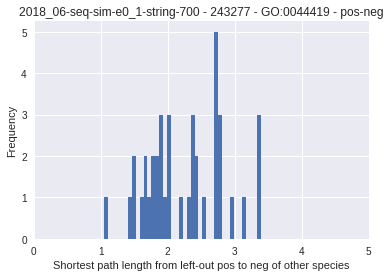

0.25: GO:0009066 381    0.7869
Name: fmax, dtype: float64


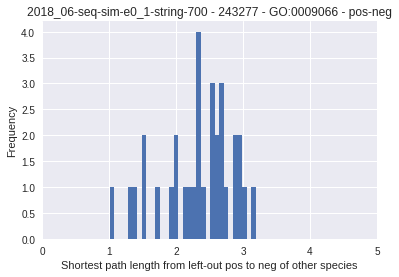

0.5: GO:0006355 311    0.8517
Name: fmax, dtype: float64


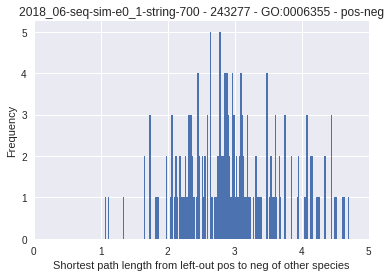

0.75: GO:0072527 386    0.9091
Name: fmax, dtype: float64


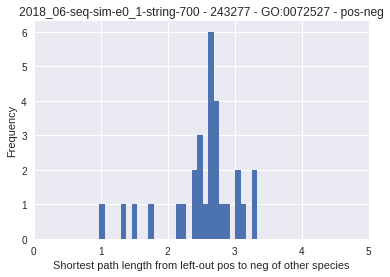

1: GO:0070475 568    1.0
Name: fmax, dtype: float64


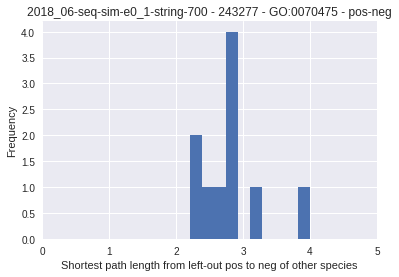

In [95]:
for val in [0,0.25,0.5,0.75,1]:
# for val in [0.25,0.5,0.75]:
    goid = goids[int((len(goids)-1)*val)]
    fmax = fmax_df[fmax_df['goid'] == goid]['fmax']
    print("%s: %s %s" % (val, goid, fmax))
    taxon_goid_df = df[(df['taxon'] == taxon) & (df['goid'] == goid)]
    plot_path_lengths(
        taxon_goid_df, 
        title="%s - %s - %s - %s" % (version, taxon, goid, comparison),
        ylabel="Frequency",
        xlabel="Shortest path length from left-out %s to %s of other species" % (comparison.split('-')[0], comparison.split('-')[1]),
        any_target=False,
    )


In [4]:
exp_name = "expc-comp-50-1000comp-core-bp-use-neg"
version = "2018_06-seq-sim-e0_1-string-700"
unweighted = ""
comparison = "pos-pos"
path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
print("reading from %s" % (path_lengths_file))
df_pos_pos = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])
print("\t%d values" % (len(df_pos_pos)))
comparison = "pos-neg"
path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
df_pos_neg = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])
print("reading from %s" % (path_lengths_file))
print("\t%d values" % (len(df_pos_neg)))

reading from outputs/viz/eval-species/distances/expc-comp-50-1000comp-core-bp-use-neg/2018_06-seq-sim-e0_1-string-700/pos-pos.tsv
	16732 values
reading from outputs/viz/eval-species/distances/expc-comp-50-1000comp-core-bp-use-neg/2018_06-seq-sim-e0_1-string-700/pos-neg.tsv
	16732 values


In [5]:
# make sure they're aligned
df_pos_pos.sort_values(by=['taxon', 'goid', 'p1'], inplace=True)
df_pos_neg.sort_values(by=['taxon', 'goid', 'p1'], inplace=True)

In [8]:
df_comb = df_pos_pos.copy()
df_comb['length'] = df_pos_neg['length'] - df_pos_pos['length']
df_comb.head()

,taxon,goid,p1,p2,length
5805,71421,GO:0000154,P31777,P37634,1.893858
5806,71421,GO:0000154,P43930,Q9KRH4,0.593199
5807,71421,GO:0000154,P44140,Q7CJJ1,1.354272
5808,71421,GO:0000154,P44433,P0AA39,0.688994
5809,71421,GO:0000154,P44445,P65836,0.743018


In [9]:
for val in [0,0.25,0.5,0.75,1]:
# for val in [0.25,0.5,0.75]:
    goid = goids[int((len(goids)-1)*val)]
    fmax = fmax_df[fmax_df['goid'] == goid]['fmax']
    print("%s: %s %s" % (val, goid, fmax))
    taxon_goid_df = df_comb[(df_comb['taxon'] == taxon) & (df_comb['goid'] == goid)]
    plot_path_lengths(
        taxon_goid_df, 
        title="%s - %s - %s - %s" % (version, taxon, goid, comparison),
        ylabel="Frequency",
        xlabel="Shortest path length from left-out %s to %s of other species" % (comparison.split('-')[0], comparison.split('-')[1]),
        any_target=False,
    )


NameError: name 'goids' is not defined

In [85]:
exp_name = "expc-comp-50-1000iea-core-bp-use-neg"
version = "2018_06-seq-sim-e0_1-string-700"
# unweighted = "-unw"
unweighted = ""
comparison = "pos-pos"
path_lengths_file = "outputs/viz/eval-species/distances/%s/%s/%s%s.tsv" % (exp_name, version, comparison, unweighted)
df = pd.read_csv(path_lengths_file, sep='\t', header=None, names=['taxon', 'goid', 'p1', 'p2', 'length'])

In [88]:
fmax_file = "/data/jeff-law/projects/fungcat-function-prediction/outputs/2018_06-seq-sim-e0_1-string-700/all/sinksource/expc-comp-50-1000iea-core-bp-use-neg/loso-swsn-l0-a0_95-eps0_0-maxi10.txt"
fmax_df = pd.read_csv(fmax_file, sep='\t')
fmax_df = fmax_df[fmax_df['#taxon'] == taxon]
fmax_df = fmax_df[['goid', 'fmax']].sort_values('fmax')
goids = fmax_df['goid'].values
# df[['goid', 'fmax']].quantile(0.5, numeric_only=False)